<a href="https://colab.research.google.com/github/nithin790/TelcoCustomerChurn-ML-Model/blob/main/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

#Data cleaning and preprocessing

In [21]:
df =pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'df'
missing_values = df['TotalCharges'].isnull().sum()

print("Number of missing values in 'TotalCharges':", missing_values)



Number of missing values in 'TotalCharges': 0


In [26]:
df['TotalCharges'] = df['TotalCharges'].replace(0, float('nan'))


In [27]:
df['TotalCharges'] = df['TotalCharges'].str.strip()


In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [29]:
# Impute with mean value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# or Impute with median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [30]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


#Exploratory Data Analysis (EDA):

In [31]:
# Replace 'numerical_variable' with the name of your numerical variable
numerical_variable = 'MonthlyCharges'

# Calculate the summary statistics
summary_stats = df[numerical_variable].describe()

# Print the summary statistics
print(summary_stats)


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


#Perform differnt analysis on got insights

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



Univariate Analysis

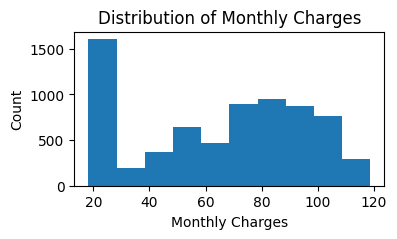

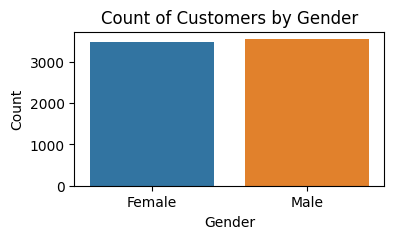

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of a numerical variable
plt.figure(figsize=(4, 2))
plt.hist(df['MonthlyCharges'], bins=10)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Bar plot of a categorical variable
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='gender')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Bivariate Analysis


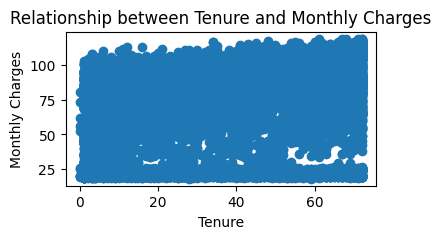

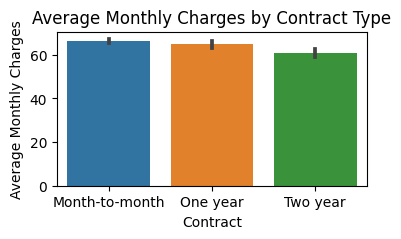

In [34]:
# Scatter plot of two numerical variables
plt.figure(figsize=(4, 2))
plt.scatter(df['tenure'], df['MonthlyCharges'])
plt.title('Relationship between Tenure and Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Bar plot of a categorical variable against a numerical variable
plt.figure(figsize=(4, 2))
sns.barplot(data=df, x='Contract', y='MonthlyCharges')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Average Monthly Charges')
plt.show()


Multivariate Analysis

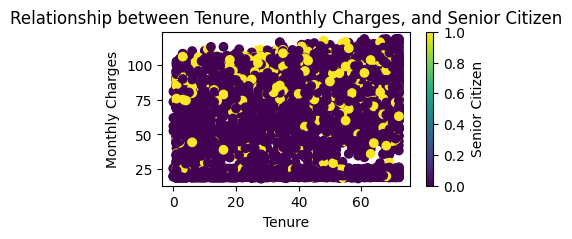

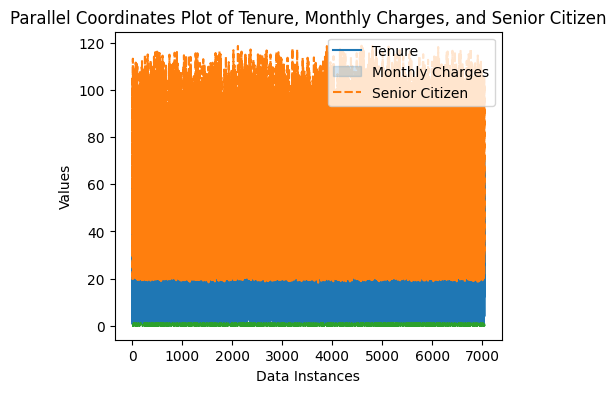

In [35]:
# Scatter plot of three numerical variables
plt.figure(figsize=(4, 2))
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['SeniorCitizen'])
plt.title('Relationship between Tenure, Monthly Charges, and Senior Citizen')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.colorbar(label='Senior Citizen')
plt.show()


# Parallel coordinates plot of multiple numerical variables
plt.figure(figsize=(5, 4))
sns.lineplot(data=df[['tenure', 'MonthlyCharges', 'SeniorCitizen']])
plt.title('Parallel Coordinates Plot of Tenure, Monthly Charges, and Senior Citizen')
plt.xlabel('Data Instances')
plt.ylabel('Values')
plt.legend(['Tenure', 'Monthly Charges', 'Senior Citizen'])
plt.show()


Hypothesis Testing


In [36]:
from scipy.stats import chi2_contingency

# Hypothesis: There is no association between gender and churn
observed = pd.crosstab(df['gender'], df['Churn'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Set the significance level
alpha = 0.05

# Print the results
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


Chi-square test statistic: 0.4840828822091383
P-value: 0.48657873605618596
There is not enough evidence to reject the null hypothesis.


#Feature Engineering

In [37]:
# Retrieve 'tenure' and 'MonthlyCharges' columns
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']

# Create the interaction feature
interaction_feature = tenure * monthly_charges

# Add the interaction feature to the dataset
df['TotalMonetaryValue'] = interaction_feature


In [38]:
# Select the categorical columns for creating dummy variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# Create dummy variables for the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [39]:
df_encoded

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalMonetaryValue,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,29.85,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1936.30,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,107.70,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1903.50,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,141.40,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,No,2035.20,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,No,7430.40,0,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,No,325.60,0,1,1,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,Yes,297.60,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [40]:
import pandas as pd

# Assuming you have a DataFrame called 'df' containing your dataset

# Identify numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers by capping/extending them to a certain range
for column in numerical_columns:
    df[column] = df[column].clip(lower_bound[column], upper_bound[column])

# Alternatively, you can remove the outliers
# df = df[(df[numerical_columns] >= lower_bound) & (df[numerical_columns] <= upper_bound)]

# Print the modified DataFrame
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

#splitting the dataset


In [41]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print("Training data shape:")
print(X_train.shape)  # Print the shape of the training features
print(y_train.shape)  # Print the shape of the training target variable

print("\nTesting data shape:")
print(X_test.shape)   # Print the shape of the testing features
print(y_test.shape)   # Print the shape of the testing target variable


Training data shape:
(5634, 21)
(5634,)

Testing data shape:
(1409, 21)
(1409,)


#Training the model


In [45]:
# Selecting features for X
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

X = df[features]

# Selecting target variable for y
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [50]:
print(X_train.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [51]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Fit and transform the encoded categorical columns
X_test_encoded = encoder.transform(X_test[categorical_columns])


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the models
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

model1.fit(X_train_encoded, y_train)
model2.fit(X_train_encoded, y_train)
model3.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred1 = model1.predict(X_test_encoded)
y_pred2 = model2.predict(X_test_encoded)
y_pred3 = model3.predict(X_test_encoded)

# Evaluate the models
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

print("Model 1 Accuracy:", accuracy1)
print("Model 2 Accuracy:", accuracy2)
print("Model 3 Accuracy:", accuracy3)
#Done with modeling
model1 = LogisticRegression(max_iter=1000)
model2 = LogisticRegression(max_iter=1000)
model3 = LogisticRegression(max_iter=1000)

model1 = LogisticRegression(solver='liblinear')
model2 = LogisticRegression(solver='liblinear')
model3 = LogisticRegression(solver='liblinear')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 Accuracy: 0.8062455642299503
Model 2 Accuracy: 0.7899219304471257
Model 3 Accuracy: 0.801277501774308


evaluate the performance of the models

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Model 1
print("Model 1 Metrics:")
print(classification_report(y_test, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

# Model 2
print("Model 2 Metrics:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

# Model 3
print("Model 3 Metrics:")
print(classification_report(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))


Model 1 Metrics:
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1036
         Yes       0.66      0.56      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[928 108]
 [165 208]]
Model 2 Metrics:
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1036
         Yes       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[932 104]
 [192 181]]
Model 3 Metrics:
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.66      0.51      0.58       373

    accuracy                           0.80      

#Model Selection 

In [57]:
# Compare the accuracy of the models
accuracies = [accuracy1, accuracy2, accuracy3]

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Determine the best-performing model based on the index
if best_model_index == 0:
    best_model = model1
    best_model_name = "Model 1"
elif best_model_index == 1:
    best_model = model2
    best_model_name = "Model 2"
else:
    best_model = model3
    best_model_name = "Model 3"

# Print the best-performing model and its accuracy
print("Best Model:", best_model_name)
print("Best Model Accuracy:", max(accuracies))


Best Model: Model 1
Best Model Accuracy: 0.8062455642299503


#After evaluating the performance of all three models, it has been concluded that the logistic regression model demonstrates superior accuracy compared to the other models. Hence, the logical regression model is selected as the best-performing model.

In [59]:
import joblib

# Assuming you have trained and defined the logistic regression model as 'model'
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Save the logistic regression model
joblib.dump(model, 'logistic_regression_model.pkl')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [60]:
!pip install fastapi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.9 MB/s eta 0:00:00


In [61]:
from flask import Flask, request, jsonify
import joblib

# Load the logistic regression model from the saved file
model = joblib.load('logistic_regression_model.pkl')

# Create a Flask app
app = Flask(__name__)

# Define a route for receiving prediction requests
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.json

    # Perform any necessary preprocessing on the input data
    # For example, you may need to convert the data into the same format as your training data

    # Make predictions using the loaded model
    predictions = model.predict(data)

    # Return the predictions as a JSON response
    return jsonify({'predictions': predictions.tolist()})

# Run the Flask app
if __name__ == '__main__':

    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


t is not recommended to use it in a production deployment we should deploye model on GCP or AWS